# WIT oil value over time

## Modules

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.signal import convolve, fftconvolve
from statsmodels.graphics.tsaplots import plot_acf

## Relevant functions

In [49]:
def changeDate(x):
    dc= {'01': 'Ene', '02': 'Feb', '03':'Mar', '04':'Abr',
         '05': 'May', '06': 'Jun', '07':'Jul', '08':'Ago',
         '09': 'Sep', '10': 'Oct', '11':'Nov', '12':'Dic'}
    s= x.split('/')
    return dc[s[1]]+'-'+s[0][2:]

## Load data

In [43]:
data= pd.read_csv("WTI.csv")
data.rename(columns={"Cierre":'Value', "Fecha": "Date"}, inplace=True)
data.drop(columns=data.columns[2:], inplace=True)

In [44]:
data.set_index("Date",inplace=True)

In [45]:
data.head()

,Value
Date,
01/09/2022,82.56
02/09/2022,83.09
03/09/2022,83.09
04/09/2022,83.15
05/09/2022,83.15


## Preprossesing

In [46]:
df= data.copy()

### Log transformation

In [50]:
df["LogValue"]= df["Value"].apply(lambda x: np.log(x))

In [51]:
df["AuxDate"]= df.index

In [52]:
df["Month"]= df['AuxDate'].map(lambda x: changeDate(x))

### Visualization

C:\Users\blute\AppData\Local\Temp\ipykernel_5580\4096453693.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(rotation=90, labels=df["AuxDate"] )


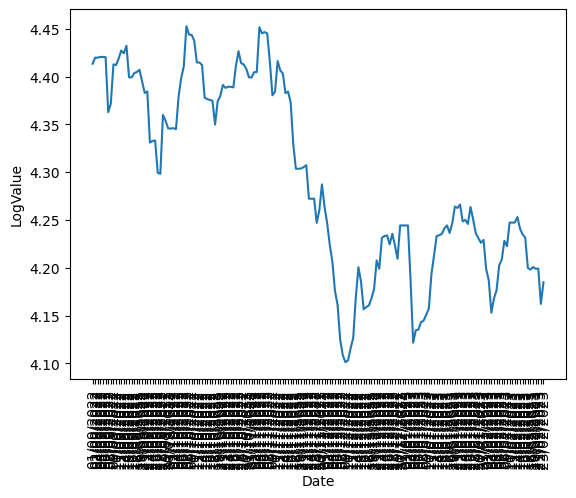

In [56]:
g=sns.lineplot(x=df.index, y="LogValue", data= df)
g.set_xticklabels(rotation=90, labels=df["AuxDate"] )
plt.show()

[Text(0.5, 1.0, 'Time series exchange')]

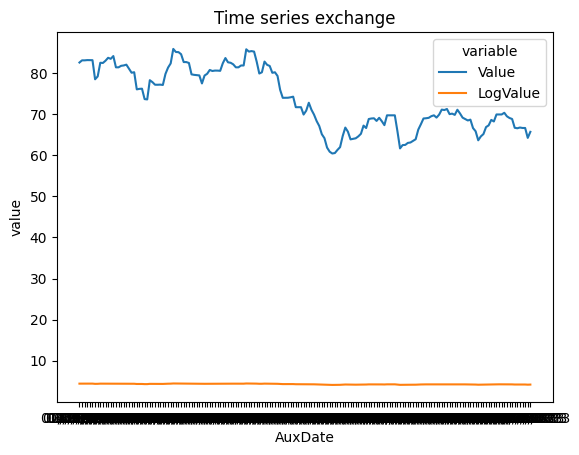

In [37]:
sns.lineplot(x='AuxDate', y='value', hue='variable',data=pd.melt(df, ['AuxDate'])).set(title='Time series exchange')